# Assignment 4
### Do three of four.

### Exercise 1: Contingent Comparisons
- Load the Minnesota use of force data.
- Bootstrap the proportion of missing values for `subject_injury` for each race, and plot the results with grouped KDE and ECDF plots
- Describe what you see. When we consider second order uncertainty, how similar or different are the sampling distributions of these proportions? 

/tmp/ipykernel_4379/144474528.py:23: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=results, x="estimate", hue=group_var, ax=axes[0]).set(title="KDE")


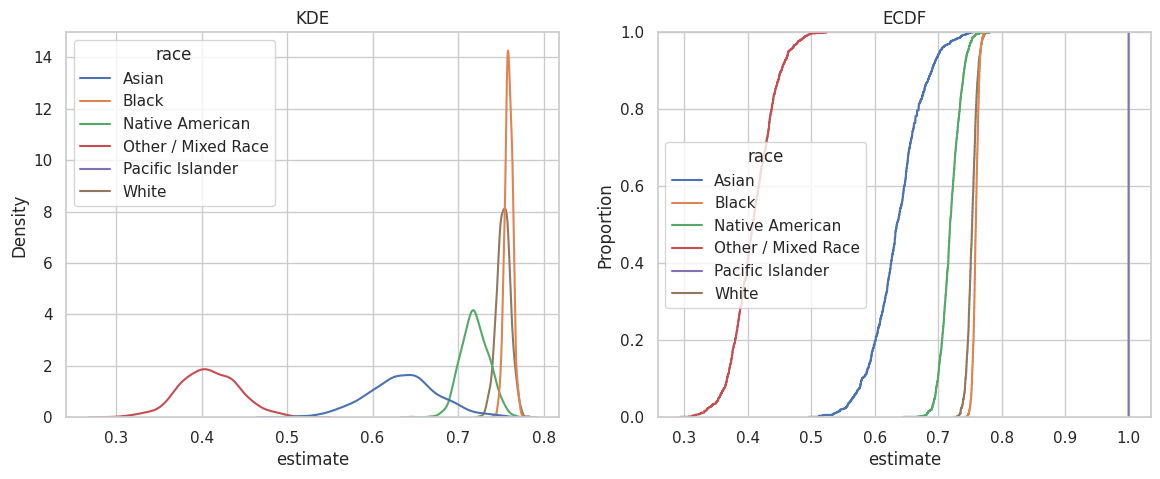

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data/mn_police_use_of_force.csv')
def prop_missing(x):
    return x.isna().    mean()
def simulate_grouped(var, group_var, df, fcn, S=1000, plot=True):   
    estimates = []
    for s in range(S):
       
        df_s = df.sample(frac=1.0, replace=True)
        
        stat_s = df_s.groupby(group_var)[var].apply(fcn)
        stat_s = stat_s.reset_index()
        stat_s.columns = [group_var, "estimate"]
        stat_s["bootstrap"] = s
        estimates.append(stat_s)
    results = pd.concat(estimates)
    if plot:
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        sns.kdeplot(data=results, x="estimate", hue=group_var, ax=axes[0]).set(title="KDE")
        sns.ecdfplot(data=results, x="estimate", hue=group_var, ax=axes[1]).set(title="ECDF")
        plt.show()
    return results
results = simulate_grouped(var="subject_injury", group_var="race", df=df, fcn=prop_missing)

Second level uncertainty looks at variation of sampling distrbution estimates from first level of uncertainty. KDE tells us the shape and spread of the distribution while ECDF tells us the culmulative probabilities.The KDE and ECDF plots show that some groups like black and white have tight sampling distributions, meaning they have low second-order uncertainty. Other groups, such as Asian, Native American,and other ahve wider distributions, meaning there is greater varability. Pacific Islander stands out with almost no variability, likely due to a very small sample size. The distributions vary with some being more tight while others being more wide, meaning there are various levels of varability.

### Exercise 2: Invitation to Inference
- Run the simulation code line by line and comment what each line is doing, or write your own code to do the resampling
- Open the NHANES or Ames prices or College Completion data. Pick a variable and a statistic to compute (e.g. mean, median, variance, IQR)
- Use the `simulate` function from class to get a sample of estimates for your statistic and your data
- Create a new function, `interval(L,H,estimates)`, that computes the $L$-th and $H$-th quantiles for your estimates, $H>L$
- If $L=.05$ and $H=.95$, this is a **90-percent confidence interval**: "For our statistic, this interval captures the true value of the population parameter 90 percent of the time. (We are 90% **confident** that it includes the true value of the parameter, but the probability that the true parameter lies in this interval is 0 or 1.)"
- We will spend much more time on this later in class, but for people who have done hypothesis testing before, you now know how to do it directly from the data: No central limit theorem required.

In [16]:
def simulate(var, df, fcn, S=1000, plot=True):  
  
    x = df[var] 

    estimates = [] 
    for s in range(S): 
        
        x_s = x.sample(frac=1.0,replace=True) 
        
        stat_s = fcn(x_s)
        
        estimates.append(stat_s)
    estimates = np.array(estimates) 

    

    if plot:
        fig, axes = plt.subplots(1, 3, figsize=(16, 4))  
        sns.kdeplot(x, ax = axes[0]).set(title='KDE of Underlying Data') 
        sns.kdeplot(estimates, ax = axes[1]).set(title='KDE of Computed Statistics') 
        axes[1].axvline(x=fcn(x), color='orange', linestyle='--') 
        sns.ecdfplot(estimates, ax = axes[2]).set(title='ECDF of Computed Statistics') 
        axes[2].axvline(x=fcn(x), color='orange', linestyle='--') 
        plt.show() 
        print(f'Variance of estimates is: {np.var(estimates)}') 
        
    return estimates 

In [17]:
df = pd.read_csv('data/nhanes_data_17_18.csv', low_memory=False)
df.head()

,SEQN,GeneralHealthCondition,EverBreastfedOrFedBreastmilk,AgeStoppedBreastfeedingdays,AgeFirstFedFormuladays,AgeStoppedReceivingFormuladays,AgeStartedOtherFoodbeverage,AgeFirstFedMilkdays,TypeOfMilkFirstFedWholeMilk,TypeOfMilkFirstFed2Milk,...,DaysSmokedCigsDuringPast30Days,AvgCigarettesdayDuringPast30Days,TriedToQuitSmoking,TimesStoppedSmokingCigarettes,HowLongWereYouAbleToStopSmoking,UnitOfMeasureDayweekmonthyear_2_SMQ,CurrentSelfreportedHeightInches,CurrentSelfreportedWeightPounds,TriedToLoseWeightInPastYear,TimesLost10LbsOrMoreToLoseWeight
0,93703.0,NaN,1.0,273.0,1.0,365.0,152.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,NaN,1.0,60.0,3.0,365.0,126.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more
3,93706.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,145.0,0.0,Never
4,93707.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


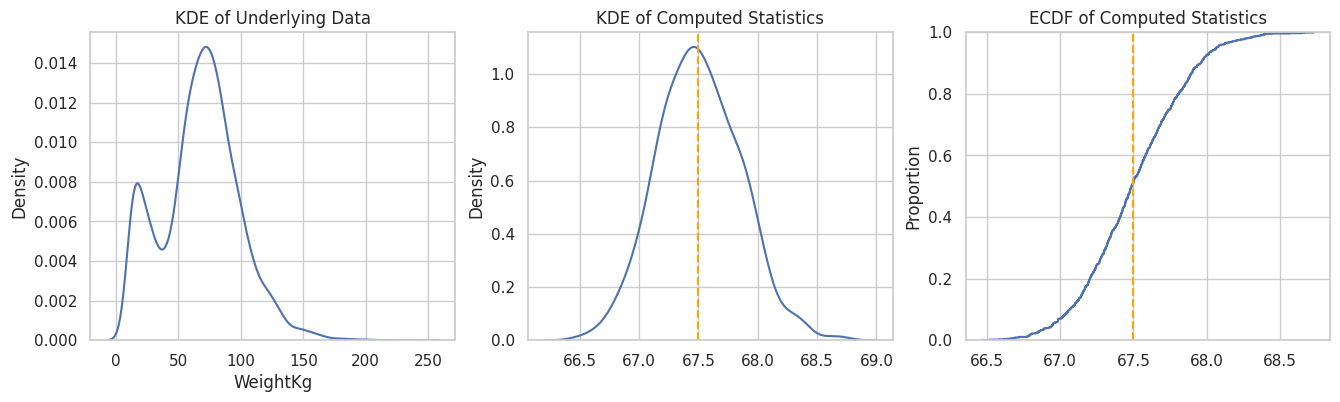

Variance of estimates is: 0.1225992082009453


array([66.98346093, 67.81476526, 67.01440194, 67.11609307, 67.69464676,
       67.95736989, 67.4618488 , 67.59711305, 67.72284917, 67.75657448,
       67.17264117, 67.93709091, 67.41717344, 67.63250605, 67.46360879,
       67.81356693, 67.40395247, 67.31113946, 67.98234867, 67.55366416,
       67.19276627, 67.59791717, 67.4449479 , 67.97347805, 67.53967484,
       67.42666423, 67.46310479, 67.63013085, 68.06351744, 67.89349465,
       67.42964714, 67.50618394, 67.77746171, 67.61867652, 67.05507405,
       67.59730746, 67.8863675 , 67.8707187 , 67.59725595, 67.70522035,
       67.86174651, 68.31925458, 67.47992723, 67.10076456, 67.96610396,
       67.33425421, 67.7204151 , 67.30097194, 67.51619036, 67.74107662,
       66.85997332, 67.88756068, 67.6713246 , 67.47941034, 67.92687455,
       67.75257482, 67.30904126, 67.65422416, 68.06617683, 67.47780343,
       67.12730583, 67.65092211, 68.01855808, 67.44589706, 67.78497692,
       67.77671682, 67.13168365, 67.64667555, 66.88505566, 68.17

In [18]:
var = 'WeightKg' # variable that of interest
fcn = np.mean
simulate(var, df, fcn, S=1000, plot=True)

The low variance of the estimate show that the bootstrap resamples are close to each other. This is a good thing becuase it means that our confidence interval is narrow.

In [19]:
def interval(L, H, df, var, fcn, S = 1000): 
    estimates = simulate(var, df, fcn, S=S, plot=False)
    lower = np.quantile(estimates, L) 
    upper = np.quantile(estimates, H) 
    return lower, upper

interval(0.05, 0.95, df, 'WeightKg', np.mean) # here i use 90% confidence interval as designed in the question.

(np.float64(66.93959972951703), np.float64(68.05077148099434))

### Exercise 3: Intro to A/B Testing
- Go here, and read about this study: https://www.clinicaltrials.gov/study/NCT01985360
- Read the Study Overview and explain what the goal of the trial is 
- Read the Study Plan and explain how it was designed and why -- there's lots of medical jargon, but the main point is how patients were assigned to interventions. 
- Read the Results Posted: Go to **Outcome Measures**. Explain how table 1 ("Incidence of Death from Any Cause or Myocardial Infarction") is a contingency table. These are the data for this exercise.
- What is the difference in surival rates between the invasive strategy and the conservative strategy?
- Bootstrap the survival rates for the two groups, and plot them as KDEs and ECDFs against one another
- Bootstrap the difference in surival rates, and plot it as a KDE and ECDF
- Is this an effective health intervention? Explain your answer clearly

This would be what CS people call **A/B testing** and everyone else called a **randomized controlled trial**: Using randomized assignment to detect the difference in outcomes between two groups. (We've just done a non-parametric version of a two-sample t-test.)

The trial NCT01985360 (ISCHEMIA-CKD trial) is designed to compare invasive strategy vs conservative (medical) strategy in patients with stable ischemic heart disease and chronic kidney disease. The purpose is to see whether intervening invasively offer survival or benefits over a conservative approach. Participants are randomly assigned to either invasive or conservative, keeping the two groups unbiased. The design uses intention to treat principles where patients are analyzed according to their assigned group regardles of crossover or adherence. 

The table is contigency table becuase it lays outcome of patients across two dimensions, the two treatment groups and whether the outcome occured (presence of death / myocardial infaraction) or not (absence of death / myocardial infarction / survival). The table cross classifies two categorical variables into frequencies (treatment x outcome) by counting the number of patients that fall into each combination of treatment and outcome. 


Using primary outcome rates from the ACC data, here are the stats that I found. The trail randomized 388 patients to the invasive arm and 389 patients to the conservative arm. The primary outcome (death / MI) ocurred 36.4% in the invasive arm vs 36.7% in the conservative arm. That implies survival rates of 63.6% and 63.3% (since it is 1 - minus the presence of the event).


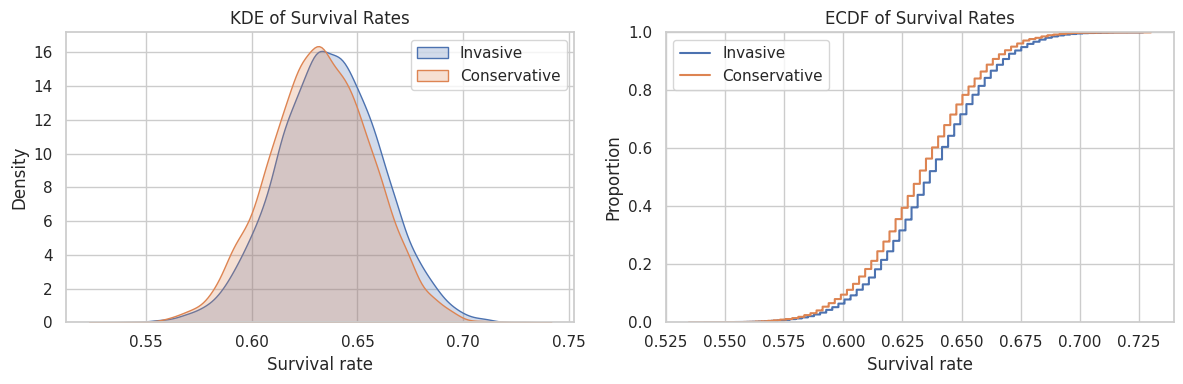

In [20]:
invasive_total, invasive_events = 388, 141 # (.364 x 388 = ~141) 
conservative_total, conservative_events = 389, 143 # (.367 x 389 = ~ 143)

y_invasive = np.array([1]*(invasive_total - invasive_events) + [0]*invasive_events)
y_conservative = np.array([1]*(conservative_total - conservative_events) + [0]*conservative_events)

def bootstrap_rate(y, B=10000, seed=0):
    rng = np.random.default_rng(seed)
    n = len(y)
    draws = rng.integers(0, n, size=(B, n))
    return y[draws].mean(axis=1)

# Here I get the bootstrap samples for both groups
boot_inv = bootstrap_rate(y_invasive, B=10000, seed=1)
boot_con = bootstrap_rate(y_conservative, B=10000, seed=2)

# KDE Plot
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.kdeplot(boot_inv, fill=True, ax=axes[0], label="Invasive")
sns.kdeplot(boot_con, fill=True, ax=axes[0], label="Conservative")
axes[0].set_title("KDE of Survival Rates")
axes[0].set_xlabel("Survival rate")
axes[0].legend()


#Ecdf plot
sns.ecdfplot(boot_inv, ax=axes[1], label="Invasive")
sns.ecdfplot(boot_con, ax=axes[1], label="Conservative")
axes[1].set_title("ECDF of Survival Rates")
axes[1].set_xlabel("Survival rate")
axes[1].legend()
plt.tight_layout()
plt.show()


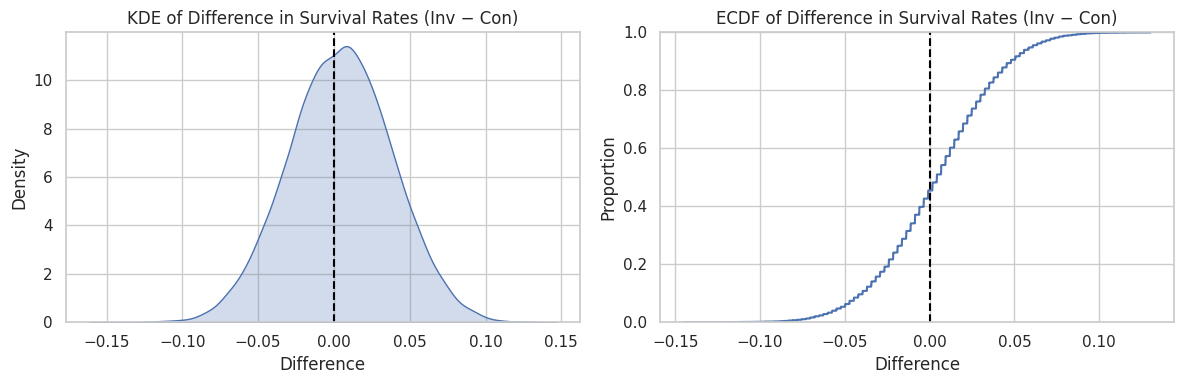

Difference CI (95%): [-0.0627304   0.00422707  0.07111812]
P(Invasive > Conservative): 0.545


In [21]:
boot_diff = boot_inv - boot_con # where the difference is equal function of the survival invasive and surivial conservative 

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.kdeplot(boot_diff, fill=True, ax=axes[0])
axes[0].axvline(0, ls="--", color="black")
axes[0].set_title("KDE of Difference in Survival Rates (Inv − Con)")
axes[0].set_xlabel("Difference")

sns.ecdfplot(boot_diff, ax=axes[1])
axes[1].axvline(0, ls="--", color="black")
axes[1].set_title("ECDF of Difference in Survival Rates (Inv − Con)")
axes[1].set_xlabel("Difference")
plt.tight_layout()
plt.show()

# Here I use a 95% confidence interval
ci = np.percentile(boot_diff, [2.5, 50, 97.5])
p_better = (boot_diff > 0).mean()
print(f"Difference CI (95%): {ci}")
print(f"P(Invasive > Conservative): {p_better:.3f}")


Based on my analysis, the patients undergoing invasive strategy do not experience  better surival rates than those treated conservatively. This is becuase the boostrap survival rates are nearly identical for both for treatments and the difference in distribution is near zero. Given the cost of the invasive treatment, this is not a good health intervention relative with going with a conservative approach. 

### Exercise 4: Prediction Uncertainty
- Pick a dataset and two continuous variables.
- Recall the LCLS estimator:
$$
\hat{y}(z) =  \frac{ \frac{1}{N} \sum_{i=1}^N y_i \times \frac{1}{h}k\left( \frac{z - x_i}{h} \right)}{ \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k\left( \frac{z - x_i}{h} \right)}
$$
with the Epanechnikov kernel and the standard plug-in bandwidth for $h$
- Compute and plot this line for 30 bootstrap samples. Notice where there is a lot of variation in the predictions, versus little variation in the predictions.
- Now, for any $z$, we can bootstrap a distribution of predictions using the above formula. Do this at the 25th percentile, median, and 75th percentile of $X$, and make KDE plots of your results.
- Now, pick a grid for $z$: Obvious choices are all of the unique values in the data, or an equally spaced grid from the minimum value to the maximum value. For each $z$, bootstrap a sample of predictions and compute the .05 and .95 quantiles. Plot these error curves along with your LCLS estimate. Where are your predictions "tight"/reliable? Where are they highly variable/unreliable?